<a href="https://colab.research.google.com/github/stargalax/Codsoft/blob/main/instagram_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import the data set into colab!
from google.colab import files
uploaded = files.upload()

Saving Instagram data.csv to Instagram data.csv


In [9]:
#check if it is uploaded and import the lib needed!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

data = pd.read_csv("Instagram data.csv", encoding = 'latin1')
#print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [11]:
data.isnull().sum()
data = data.dropna()
data = data.dropna()
#print(data)
#clean the data!

     Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0           3920       2586           1028           619          56     98   
1           5394       2727           1838          1174          78    194   
2           4021       2085           1188             0         533     41   
3           4528       2700            621           932          73    172   
4           2518       1704            255           279          37     96   
..           ...        ...            ...           ...         ...    ...   
114        13700       5185           3041          5352          77    573   
115         5731       1923           1368          2266          65    135   
116         4139       1133           1538          1367          33     36   
117        32695      11815           3147         17414         170   1095   
118        36919      13473           4176         16444        2547    653   

     Comments  Shares  Likes  Profile Visits  Follo

<ipython-input-12-56b9aea354db>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Home'])


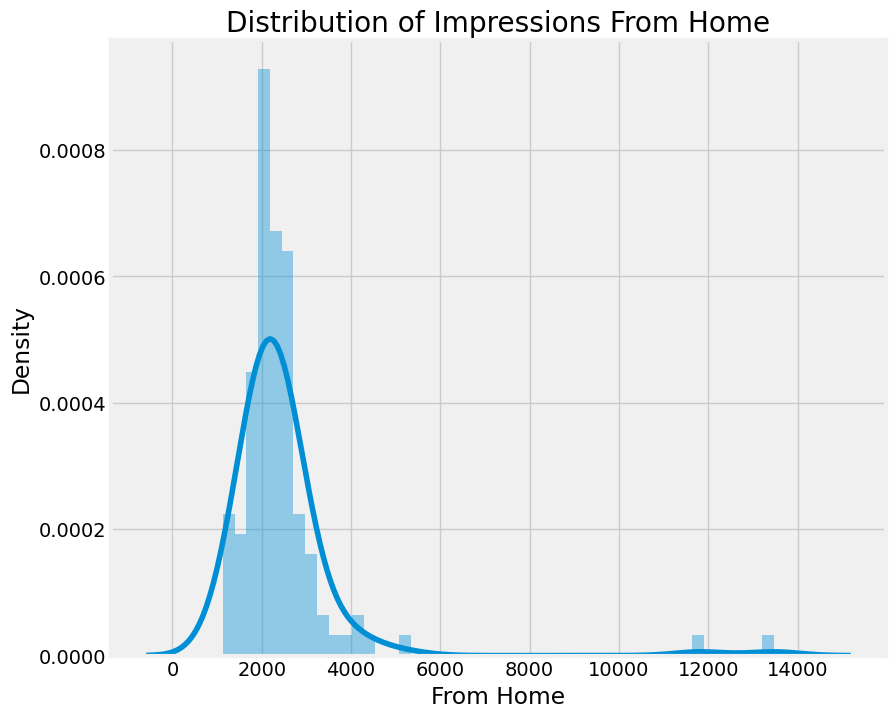

In [12]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

In [13]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels,
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

In [15]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols",
                    title = "Relationship Between Likes and Impressions")
figure.show()
#impression vs like

In [16]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


<ipython-input-16-e57b1c4dec3a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



we can say that if a post has more likes and saves then it will get more reach but a low share wont affect the reach.

In [17]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In Instagram, conversation rate means how many followers you are getting from the number of profile visits from a post. The formula that you can use to calculate conversion rate is (Follows/Profile Visits) * 100
hence 41% isnt a bad number

In [18]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols",
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

the graphs is linear thus we can say that eachtime someone visits the profile there is a high chance they become a follower of it

In [19]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares',
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([11135.39246541])

the above prediction model predicts the impression for a set of likes saves etc.
model used is:PassiveAggressiveRegressor

In [ ]:
#thank you!